<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [47]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install Scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 128.7 MB/s eta 0:00:0000:01


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [7]:
## Write your code here
# Set pandas option to display all columns
pd.set_option('display.max_columns', None)
print(df.columns)
print(df.dtypes)
df.info()

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [12]:
## Write your code here
df[['Employment', 'JobSat','YearsCodePro','RemoteWork' ]].isnull().sum()

for col in ['Employment', 'RemoteWork','YearsCodePro']:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)

for col in ['JobSat', 'ConvertedCompYearly']:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

df = df.dropna(subset=['Employment', 'JobSat', 'RemoteWork'], how='any')


print(df.isna().sum())

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork                 0
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly        0
JobSat                     0
Length: 114, dtype: int64


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [16]:
## Write your code here
# Employment
print("Employment Distribution:")
print(df['Employment'].value_counts())
print("\n")

# Job Satisfaction
print("Job Satisfaction Distribution:")
job_counts = df['JobSat'].value_counts()
print(job_counts)
print("\n")

# Years of Professional Coding Experience
print("YearsCodePro Distribution:")
print(df['YearsCodePro'].value_counts())

Employment Distribution:
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking fo

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


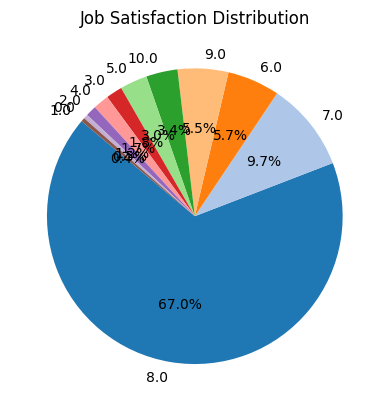

In [17]:
## Write your code here
plt.Figure(figsize=(12,6))
plt.pie(
    job_counts, 
    labels=job_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.tab20.colors
)
plt.title('Job Satisfaction Distribution')
plt.show()

A large majority of respondents (67%) reported high job satisfaction, giving scores of 8 or above, indicating that most employees are generally happy with their jobs.
A smaller group (9.7%) rated their satisfaction as 7, reflecting a moderately positive experience.
An even smaller fraction (5.7%) rated their satisfaction as 6, suggesting some room for improvement.
Overall, the distribution shows that most respondents are satisfied, with only a minority expressing lower satisfaction.

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [42]:
## Write your code here
# Drop rows with missing values
new_df = df[['LanguageHaveWorkedWith', 'LanguageWantToWorkWith']].dropna()
# Split and flatten the lists
have_worked = new_df['LanguageHaveWorkedWith'].str.split(';').explode()
want_to_work = new_df['LanguageWantToWorkWith'].str.split(';').explode()
have_counts = have_worked.value_counts()
want_counts = want_to_work.value_counts()

# Combine into a DataFrame for comparison
lang_compare = pd.DataFrame({
    'HaveWorked': have_counts,
    'WantToWork': want_counts
}).fillna(0).sort_values('HaveWorked', ascending=False)

print(lang_compare.head(10))  # Top 10 languages

                         HaveWorked  WantToWork
JavaScript                    34915       23774
HTML/CSS                      29762       20721
Python                        28952       25047
SQL                           28697       22400
TypeScript                    21759       20239
Bash/Shell (all shells)       19390       13744
Java                          16987       10668
C#                            15163       12921
C++                           12960       10873
C                             11455        8275


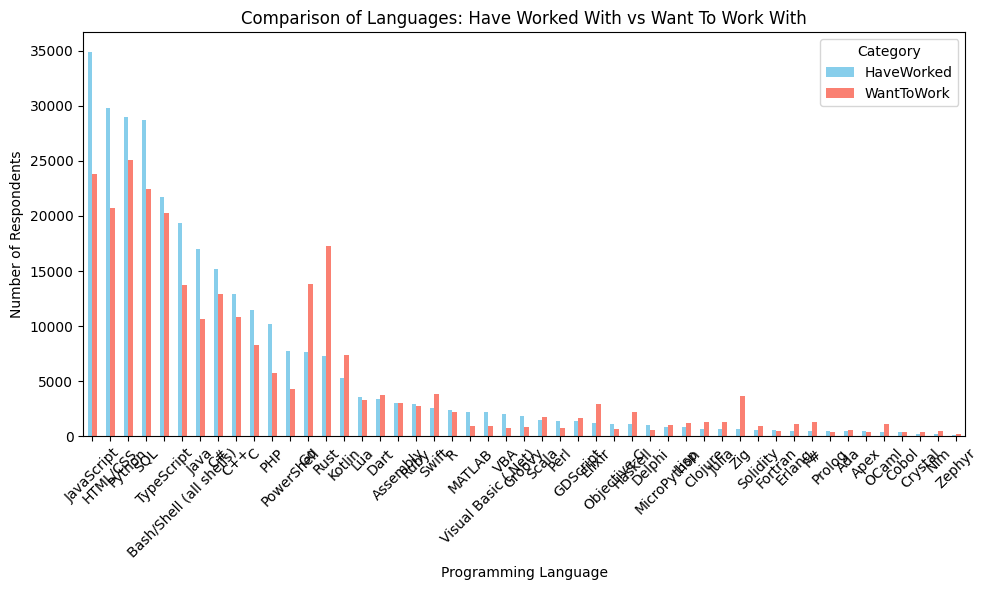

In [20]:
lang_compare.plot(
    kind='bar', 
    figsize=(10,6),
    color=['skyblue', 'salmon']
)
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.title('Comparison of Languages: Have Worked With vs Want To Work With')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


In [44]:
remote_df = df[['Country', 'RemoteWork']].dropna()

remote_grouped = remote_df.groupby(['Country', 'RemoteWork']).size().reset_index(name='Count')

remote_pivot = remote_grouped.pivot(
    index='Country', 
    columns='RemoteWork', 
    values='Count'
).fillna(0)  # Fill missing combinations with 0remote_count = pd.crosstab(remote_df['Country'], remote_df['RemoteWork'])
remote_pivot.head()

RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote
Country,,,
Afghanistan,33.0,13.0,10.0
Albania,25.0,10.0,14.0
Algeria,47.0,8.0,22.0
Andorra,6.0,5.0,4.0
Angola,9.0,6.0,5.0


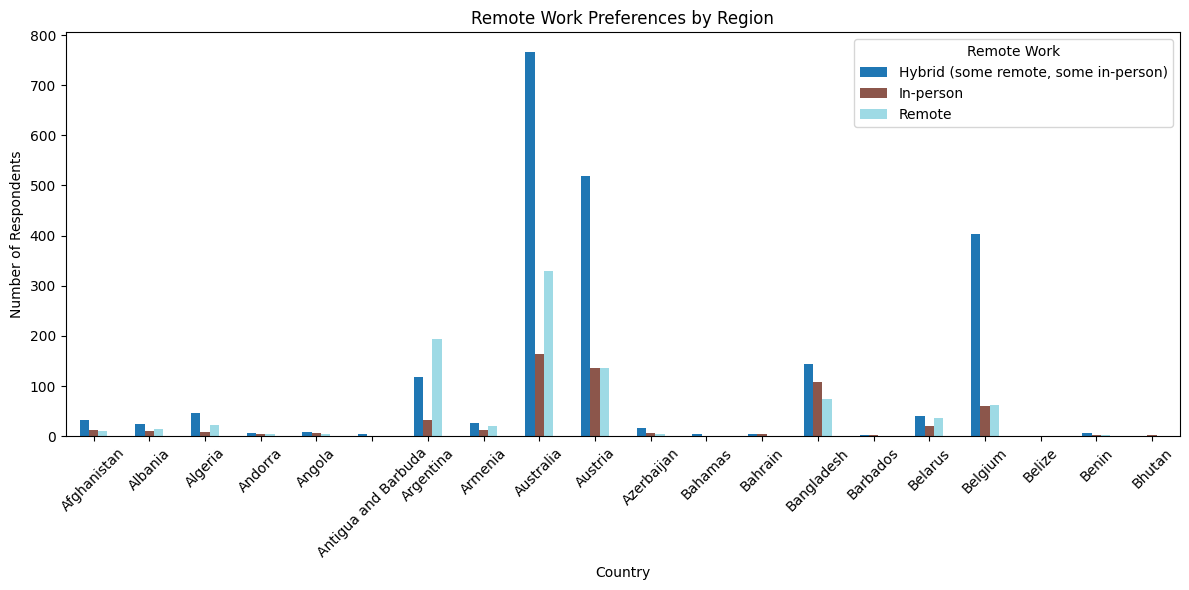

In [41]:
## Write your code here
# Select relevant columns and drop missing values
remote_df = df[['Country', 'RemoteWork']].dropna()

#remote_count = remote_df.groupby('Country',)['RemoteWork'].count()
#remote_count = pd.crosstab(remote_df['Country'], remote_df['RemoteWork'])

remote_pivot.head(20).plot(
    kind='bar',
    figsize=(12,6),
    colormap='tab20'
)
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.title('Remote Work Preferences by Region')
plt.xticks(rotation=45)
plt.legend(title='Remote Work')
plt.tight_layout()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [48]:
## Write your code here
!pip install scipy
# Drop missing values
corr_df = df[['YearsCodePro', 'JobSatPoints_1']].dropna()
# Convert YearsCodePro to numeric
corr_df['YearsCodePro_clean'] = pd.to_numeric(
    corr_df['YearsCodePro'].replace({'Less than 1 year': 0, 'More than 50 years': 51}),
    errors='coerce'
)
#Pearson Correlation
pearson_corr = corr_df['YearsCodePro_clean'].corr(corr_df['JobSatPoints_1'], method='pearson')
print(f"Pearson correlation: {pearson_corr:.2f}")

#Spearman Correlation

spearman_corr = corr_df['YearsCodePro_clean'].corr(corr_df['JobSatPoints_1'], method='spearman')
print(f"Spearman correlation: {spearman_corr:.2f}")

Pearson correlation: -0.03
Spearman correlation: 0.06


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [49]:
## Write your code here
# Select relevant columns and drop missing values
edu_emp_df = df[['Employment', 'EdLevel']].dropna()
# Cross-tabulate Employment vs Education Level
edu_emp_ct = pd.crosstab(edu_emp_df['EdLevel'], edu_emp_df['Employment'])

print(edu_emp_ct)

# Plot stacked bar chart
edu_emp_ct.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='tab20'
)

plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.title('Employment Status by Education Level')
plt.xticks(rotation=45)
plt.legend(title='Employment Type', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      16806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   11011   
Primary/elementary school                                           160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2073   
Secondary school (e.g. American high school, Ge...                 1460   
Some college/university study without earning a...                 3579   
Something else                                                      377   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)                        

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
